M. Varun Sankar

EE18BTECH11030



a. The function is step and convex. sublevel sets of step are convex sets,
The objective minimize 0 and included the sublevel sets in the constraints and solved this using bisection algorithm.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp


In [13]:
angle = 15*3.141592/180.0

M = np.matrix([[-np.sin(angle), np.sin(angle)],
               [np.cos(angle), np.cos(angle)]])
initial = [[0] , [0]]
destination = [[10] ,[2]]
mass = 0.1
grav = [[0],[-9.8]]
h = 0.1
tenmax = 2.0


i_low = 10 
i_high = 100
TT = 0
PP = 0

while i_high - i_low != 1 :
  t = (i_high + i_low) // 2
  T = cp.Variable((2, t - 1))
  v = cp.Variable((2, t))
  p = cp.Variable((2, t))
  F = M * T + mass * (grav * np.ones(t - 1))
  
  objective = cp.Minimize(0)
  constraints = [T >= 0,
                 T <= tenmax,
                 v[:, 0] == 0,
                 v[:,t - 1] == 0,
                 v[:, 1 : t] == v[:, 0 : t - 1] + (h/mass) * F,
                 p[:, 0] == [0, 0], 
                 p[:, t - 1] == [10, 2],
                 p[:, 1 : t] == p[:, 0 : t - 1] + h * v[:, 0 : t - 1]]
  
  prob = cp.Problem(objective,constraints)
  prob.solve()
  
  if prob.value == 0:
    i_high = t
    TT = T.value
    PP = p.value
  else :
    i_low = t
t = i_high;

print("min time:",round(t * h, 5))

min time: 3.4


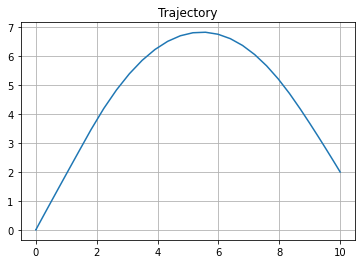

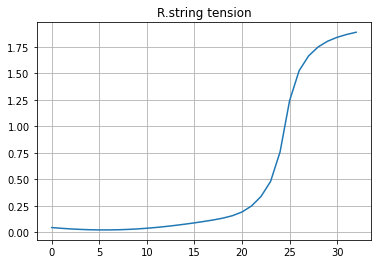

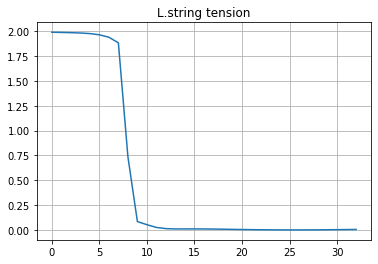

In [14]:
plt.plot(PP[0],PP[1])
plt.title("Trajectory")
plt.grid()
plt.show()

plt.plot(np.transpose(TT[0]))
plt.title("R.string tension")
plt.grid()
plt.show()

plt.plot(np.transpose(TT[1]))
plt.title("L.string tension")
plt.grid()
plt.show()




From the trajectory plot that load doesn't travel move along the shortest path. The load should cross a horizontal distance so right tension is increased.